Saving house price dataset.csv to house price dataset.csv


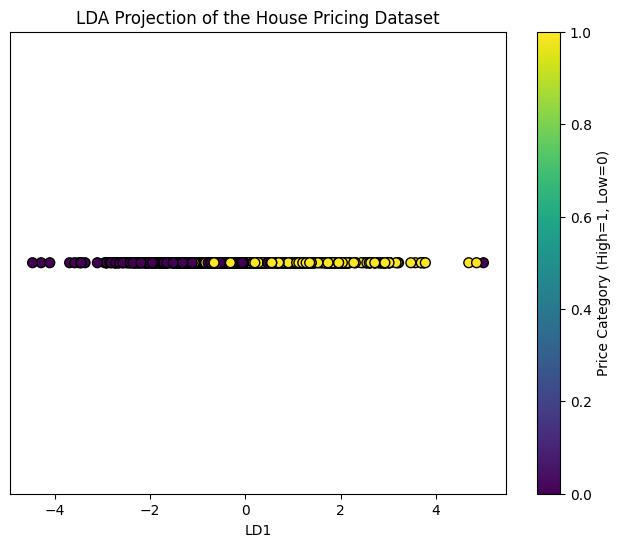

Explained variance ratio: [1.]


In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Creating a binary target variable based on the median sale price
median_price = data['SalePrice'].median()
data['PriceCategory'] = (data['SalePrice'] > median_price).astype(int)  # 1 for high, 0 for low

# Selecting a few features for LDA
features = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF']
X = data[features]
y = data['PriceCategory']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating an LDA model
lda = LDA(n_components=1)  # We're reducing to one dimension for simplicity and visualization

# Fitting LDA on the training data
X_lda = lda.fit_transform(X_train, y_train)

# Plotting the result
plt.figure(figsize=(8, 6))
plt.scatter(X_lda, [0] * len(X_lda), c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA Projection of the House Pricing Dataset')
plt.xlabel('LD1')
plt.yticks([])
plt.colorbar(label='Price Category (High=1, Low=0)')
plt.show()

# Displaying explained variance ratio
print("Explained variance ratio:", lda.explained_variance_ratio_)